# Principal component analysis
We will perform principal component analysis (PCA) to perform dimensionality reduction. First, we will implement PCA on a 2D dataset to visualize what is happening more easily.

## PCA from 2D to 1D
### An example dataset
Our example is a set of linearly correlated values.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set()
import scipy.io

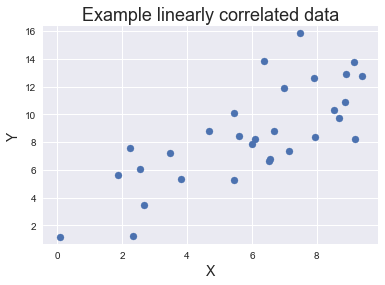

In [2]:
#generation of a linearly correlated 2D dataset
X = np.random.uniform(0, 10, 30)[:, np.newaxis]
Y = np.array([i + 2 + np.random.randn() * 2 for i in X])
data = np.hstack((X, Y))

#plot dataset
fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_xlim(min(X) - 0.5, max(X) + 0.5)
ax.set_ylim(min(Y) - 0.5, max(Y) + 0.5)
ax.set_title("Example linearly correlated data", fontsize=18)
plt.show()

### PCA implementation
PCA has two main computational steps. First, we calculate the **covariance matrix** of the data. Second, we calculate the **eigenvectors** $U_1, U_2, ... , U_n$, which correspond to the principal components of the variation in the data. It is important to **normalize and scale** the data by subtracting the mean and dividing by the standard deviation so each dimension is in the same range.

In [3]:
#data normalization
data_norm = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

After data normalization we calculate the **covariance matrix** of the data:
$$\Sigma = \frac{1}{m}X^{T}X$$
where X is the data matrix with examples in rows and $m$ is the number of examples. $\Sigma$ is a $n \times n$ matrix and not the summation operator.

In [4]:
#covariance matrix
Sigma = np.dot(data_norm.T, data_norm) / data_norm.shape[0]

We can now run the **singular value decomposition** (svd) on the covariance matrix to calculate the principal components.

In [5]:
#U are principal components vectors, S is the diagonal matrix
U, S, V = np.linalg.svd(Sigma)

We now draw the principal components centered at the mean of data.

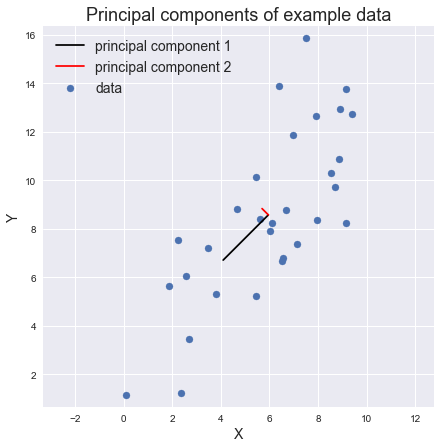

In [6]:
#position of principal components vectors
mu = np.mean(data, axis=0)
u0 = [[mu[0], (mu + 1.5 * np.dot(S[0], U[:, 0].T))[0]],
       [mu[1], (mu + 1.5 * np.dot(S[0], U[:, 0].T))[1]]]
u1 = [[mu[0], (mu + 1.5 * np.dot(S[1], U[:, 1].T))[0]],
       [mu[1], (mu + 1.5 * np.dot(S[1], U[:, 1].T))[1]]]

#plot data
fig, ax = plt.subplots(figsize=(7, 7))
ax.axis('equal')
ax.scatter(X, Y, label='data')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_xlim(min(X) - 0.5, max(X) + 0.5)
ax.set_ylim(min(Y) - 0.5, max(Y) + 0.5)


#plot principal components
ax.plot(u0[0], u0[1], color='black', label='principal component 1')
ax.plot(u1[0], u1[1], color='red', label='principal component 2')

ax.set_title("Principal components of example data", fontsize=18)
ax.legend(fontsize=14)
plt.show()

### Dimensionality reduction
Now that we have calculated the principal components, we can use them to reduce the number of features in our dataset by projecting each example onto a lower dimensional space. Here, we will use the eigenvectors and project the example dataset on a 1D space. Then, we will approximately recover the data by projecting them back onto the original higher dimensional space.

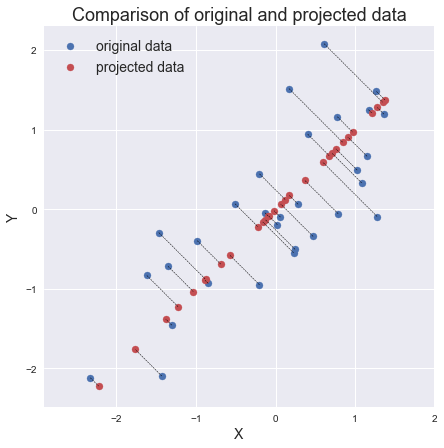

In [7]:
#calculation of the projection of data on K dimensions
K = 1
Z = np.dot(data_norm, U[:, 0:K])

#recovery of data
data_rec = np.dot(Z, U[:, 0:K].T)

#plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.axis('equal')

#original data
ax.scatter(data_norm[:, 0], data_norm[:, 1], color='C0', label='original data')

#projected data
ax.scatter(data_rec[:, 0], data_rec[:, 1], color='C2', label='projected data')

#relationship between original and projected data
for  i in range(X.shape[0]):
    ax.plot([data_norm[i, 0], data_rec[i, 0]], [data_norm[i, 1], data_rec[i, 1]], color='black', linestyle='--', linewidth=0.5)

ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Y", fontsize=14)
ax.set_title("Comparison of original and projected data", fontsize=18)
ax.legend(fontsize=14)
plt.show()

## Face image dataset
We will perform PCA on face images to see how it can be used for dimension reduction on concrete data. The dataset *ex7faces.mat* contains a dataset of 32 x 32 grayscale images. Each one of the 5000 rows is one face image, corresponding to a vector of size 1024. Let's display a sample of images.

In [12]:
#load faces data
faces = scipy.io.loadmat("ex7faces.mat")
X = faces['X']

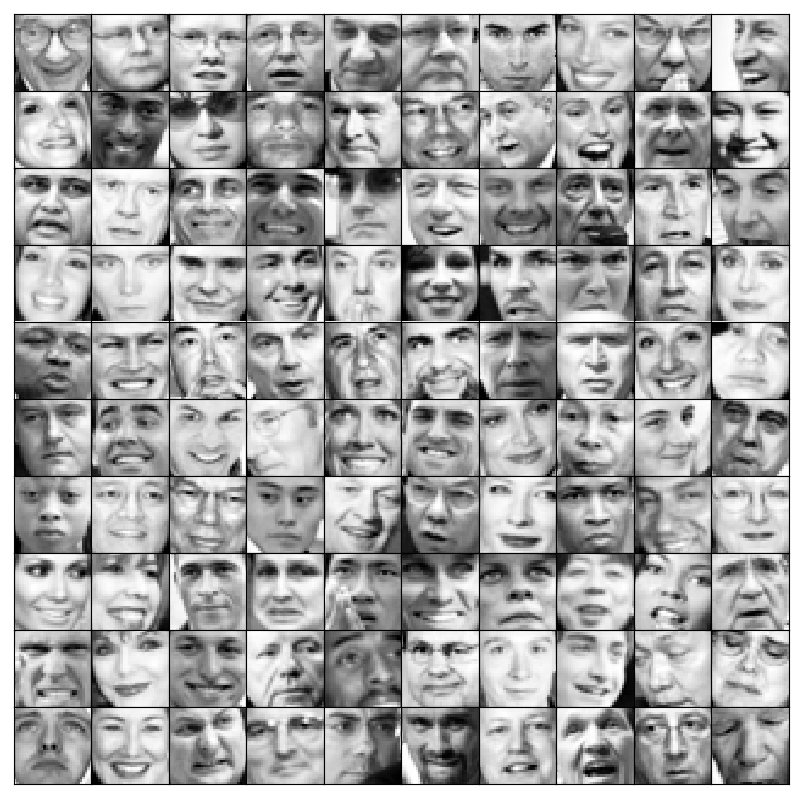

In [65]:
#reset settings
sns.reset_orig()

#display a sample of images
plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(10, 10)
gs.update(wspace=0, hspace=0)

for i in range(100):
    ax = plt.subplot(gs[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(X[i, :].reshape((32, 32)).T, cmap='Greys_r')
    ax.tick_params(left=False, bottom=False)
    ax.set_aspect('auto')

Let's now implement PCA on the faces dataset. We will project the data on the first 100 principal components, so each image will be described by a vector $z^{(i)} \in \mathbb{R}^{100}$, meaning a 10 times reduction in data content. We will then recover the data and plot the corresponding images to understand what was lost during dimension reduction.

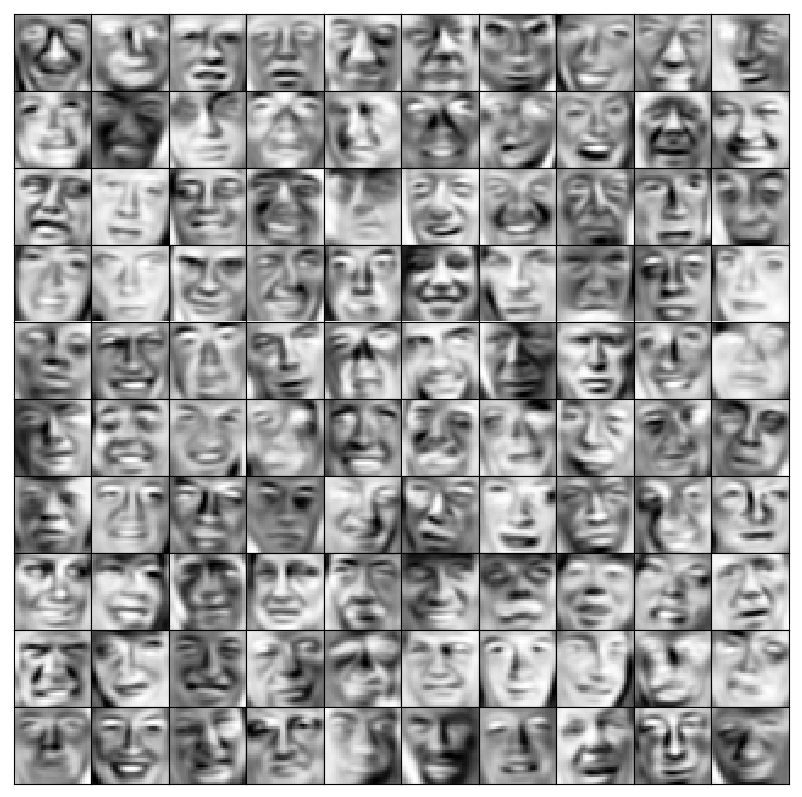

In [67]:
#data normalization
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

#covariance matrix
Sigma = np.dot(X_norm.T, X_norm) / X_norm.shape[0]

#U are principal components vectors, S is the diagonal matrix
U, S, V = np.linalg.svd(Sigma)

#calculation of the projection of data on K dimensions
K = 100
Z = np.dot(X_norm, U[:, 0:K])

#recovery of data
X_rec = np.dot(Z, U[:, 0:K].T)

#plot recovered data
plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(10, 10)
gs.update(wspace=0, hspace=0)

for i in range(100):
    ax = plt.subplot(gs[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.imshow(X_rec[i, :].reshape((32, 32)).T, cmap='Greys_r')
    ax.tick_params(left=False, bottom=False)
    ax.set_aspect('auto')